# Simple perceptron 
## Python 3 implementation

This is a python sequential implementation of a linear classifier using a single neuron neural network. <br>
This code is based on the theory exposed in the 2nd edition of the book Neural Network Design written by Martin Hagan.

This perceptron receives two inputs corresponding to points in space $x$ and $y$.<br>
The job of this perceptron is to calculate the weights of the inputs for which all the points are correctly classified in two regions.This is when $x > y$.<br>
The interval in which data points can be generated is $[0,1]$.<br>
The next block of the code generates the data points for training and initializes the weights of the inputs:

In [208]:
import numpy as np
import matplotlib.pyplot as plt

#Generating training data
n = 50 #number of data points
x = np.random.rand(n) 
y = np.random.rand(n)
data = [[x[i],y[i],int(x[i] > y[i])] for i in range(n)] #[x,y,output]
W = [np.random.rand(),np.random.rand()]

The boundary lineas appears when:
\begin{equation}
    W_1x + W_2y = 0,
\end{equation}

clearing $y$ from the equation:
\begin{equation}
    y = \frac{-W_1x}{W_2}
\end{equation}

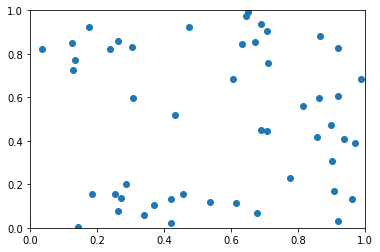

Initial weights: [0.9524622870282158, 0.0531239140193267]


In [209]:
x1 = np.asarray([-2,2])
y1 = (-W[0] * x1)/W[1]
plt.scatter(x,y)
plt.plot(x1,y1)
plt.axis([0,1,0,1])
plt.show()
print("Initial weights:",W)

A step function is used as the activation function of the neuron:

In [210]:
#step function
def activation_function(x):
    if x >= 0:
        return 1
    else:
        return 0

In the training process, the weights of the inputs are updated if the neural network gets the wrong expected output.\
The next generalization is used for updating the weights: <br>
$$W_{new} = W_{old} + ne_iP_i$$
Where $W_{new}$ is the new weights vector.<br>
$W_{old}$ is the old weights vector.<br>
$n$ being the learning rate to moderate the changes in the weights.
$e_i$ is the error in the output calculated by $(expected - estimated)$.<br>
$P_i$ is the vector of data points.

In [211]:
#Training
lr = 0.1 #learning rate
t = 150 #Number of iterations
#Weights of inputs without bias, boundary line passes through the origin
for i in range(t):
    for j in range(n):
        sum_ = (data[j][0] * W[0]) + (data[j][1] * W[1])
        estimated = activation_function(sum_)
        expected = data[j][2]
        if estimated != expected:
            error = expected - estimated
            W[0] = W[0] + (lr * data[j][0] * error)
            W[1] = W[1] + (lr * data[j][1] * error)

Ones the perceptron is trained, the boundary line and final weights are checked.

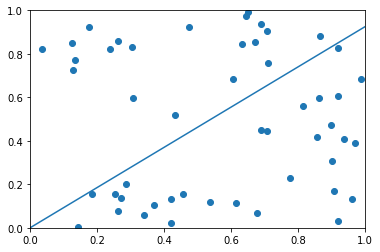

Final weights: [0.538379885582265, -0.5822902430125847]


In [212]:
x1 = np.asarray([-2,2])
y1 = (-W[0] * x1)/W[1]
plt.scatter(x,y)
plt.plot(x1,y1)
plt.axis([0,1,0,1])
plt.show()
print("Final weights:",W)

And the perceptron is tested with new unkown values

In [213]:
#Testing
x_test = np.random.rand(n)
y_test = np.random.rand(n)
data_test = [[x_test[i],y_test[i],int(x_test[i] > y_test[i])] for i in range(n)]
success_rate = 0
for i in range(n):
    expected = data_test[i][2]
    sum_test = (data_test[i][0] * W[0]) + (data_test[i][1] * W[1])
    estimated = activation_function(sum_test)
    if estimated == expected:
        success_rate += 1
success_rate = success_rate/n
print("Success rate:",success_rate)
    

Success rate: 1.0
